2. Mini-Batch Gradient Descent para entrenar un modelo cuadrático

    * Crear un dataset sintético con 10,000 muestras a partir de la siguiente expresión (donde “x” es la feature que toma valores entre 0 y 4, e “y” es la salida):
        
        ![equation](https://latex.codecogs.com/svg.image?%7B%5Ccolor%7BYellow%7D%20y%20=%20-(x-2)%5E2%20&plus;%203%20&plus;%200.2%20*%20sin(16*x)%7D)
    
    * Suponer que se tiene un modelo, tal que la relación entre la salida y la entrada está dada por la ecuación presentada a continuación. Suponiendo que se va a utilizar mini-batch SGD para encontrar los valores óptimos de los pesos w1, w2 y w3 tal que minimizan el ECM (Error Cuadrático Medio) (el ECM es la función de costo para este problema), ¿cuál sería la regla de actualización de cada parámetro?. Implementar el algoritmo en Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar la evolución del ECM con el número de epochs.   

        ![equation](https://latex.codecogs.com/svg.image?%7B%5Ccolor%7BYellow%7D%20%5Chat%7By%7D%20=w_1*x%5E2&plus;w_2*x&plus;w_3%7D)

In [1]:
# Importamos las librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

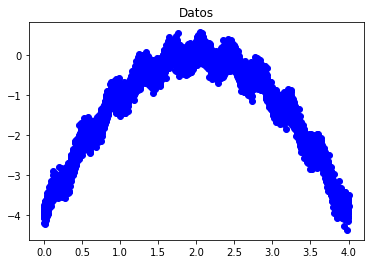

In [2]:
#Se define el dataset 
def f(x):  
    np.random.seed(42) 
    y = -(x-2)**2 + 3*0.05*np.random.randn(x.shape[0]) + .2*np.sin(16*x)
    return y
n = 10000
X = np.random.uniform(0,4,n)  
Y = f(X) 
plt.scatter(X,Y,label='data', color='blue')
plt.title('Datos');




In [3]:
#Calculamos los tres gradientes, correspondientes a los tres coeficientes
def gradientes(x, y, b):
    res = b[0] + b[1] * x +b[2]*(x**2)- y
    return res.mean(), (res * x).mean(), (res * (x**2)).mean() 


In [4]:
def mse(y_hat,y_train):
        return np.mean((y_hat-y_train)**2)/2

In [10]:
def sgd(gradient, x, y, n_vars=None, start=None, learn_rate=0.01,decay_rate=0.0, batch_size=1, epoch=50,
    dtype="float64", random_state=None ):

    # Se lleva todo a numpy
    dtype_ = np.dtype(dtype)
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Inicializando, en caso stocastico de forma aleatoria
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)
    vector = (rng.normal(size=int(n_vars)).astype(dtype_)
               if start is None else np.array(start, dtype=dtype_))
 
    # SGD

    for i in range(epoch+1):
        # random shuffle 
        rng.shuffle(xy)
        # Minibatch, si batch_size es distinto de 1 y de len(y)
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]
            # Calculamos el paso
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = -learn_rate * grad
            #print(grad)
        
   
            # Actualizamos las tres variables
            vector += diff
        y_hat=vector[0] + vector[1] * x +vector[2]*(x**2)
        mse_=mse(y_hat,y)
        print("epoch= {}, mse= {}".format(i,mse_))


    return vector if vector.shape else vector.item()

In [13]:
b0,b1,b2=sgd(gradientes, X, Y, n_vars=3, learn_rate=0.001,decay_rate=0.8, batch_size=1, epoch=10, random_state=10)

print(b0,b1,b2)

epoch= 0, mse= 0.2907066661967531
epoch= 1, mse= 0.12271962723009461
epoch= 2, mse= 0.060559536552563506
epoch= 3, mse= 0.035576810218478916
epoch= 4, mse= 0.026622628741537237
epoch= 5, mse= 0.023292560992228508
epoch= 6, mse= 0.022033437337846396
epoch= 7, mse= 0.02370564658734911
epoch= 8, mse= 0.021320360955117756
epoch= 9, mse= 0.0218246202546572
epoch= 10, mse= 0.022665094806802455
-3.9672150263865387 3.965808469516507 -0.9854955900781789


In [14]:
y_pred=b2*(X**2) + b1*X +b0
y_pred

array([-0.91837625, -0.34296068, -3.58971587, ..., -0.91166099,
       -0.04876266, -0.57012802])

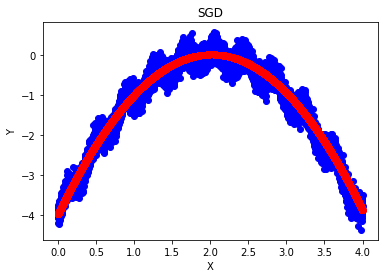

In [15]:
plt.scatter( X, Y, color = 'b' )
plt.scatter( X, y_pred, color = 'r' )
plt.title( 'SGD' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()